# Pre-Processing

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load and create dataframe to pre-process

In [2]:
df = pd.read_csv('drug_consumption_pp.csv', index_col=0)
data = df.drop(columns=['ID'])

### Create dummy variables to categorical features

In [3]:
#get a list of index for drug columns
idx_alcohol = data.columns.get_loc('Alcohol')
idx_vsa = data.columns.get_loc('VSA')
drugs = list(data.iloc[:,idx_alcohol:idx_vsa+1].columns)

#replace all categorical values with dummy values for modeling
data['Gender'] = data['Gender'].replace(('Female','Male'), (0,1))
data[drugs] = data[drugs].replace(('Non-user','User'), (0,1))

#create dummy variables for multicategorical columns
dfo = data.select_dtypes(include='object')
data = pd.concat([data.drop(dfo, axis=1), pd.get_dummies(dfo, drop_first=True)], axis=1)

pd.set_option('display.max_columns', None)
data.head()

,Gender,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation-Seeking,Alcohol,Amphetamines,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,Nicotine,VSA,Age_25-34,Age_35-44,Age_45-54,Age_55+,Education_Doctorate,Education_Left school at 17 or younger,Education_Left school at 18,Education_Masters,Education_Professional certificate/diploma,Education_Some college/university,Country_Other,Country_UK,Country_USA
0,0,39.0,36.0,42.0,37.0,42.0,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,1,29.0,52.0,55.0,48.0,41.0,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,31.0,45.0,40.0,32.0,34.0,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,34.0,34.0,46.0,47.0,46.0,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,43.0,28.0,43.0,41.0,50.0,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0


### Standardize and split data into test/training sets

In [4]:
#seperate impulsiveness and sensation-seeking features as they are already standardized
imp_ss = data[['Impulsiveness','Sensation-Seeking']]

X = data.drop(columns=['Impulsiveness','Sensation-Seeking','Nicotine'])
y = data.Nicotine

SS = StandardScaler()
X_scaled = SS.fit_transform(X)
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Modeling

### Feature engineering
Check for multicolinearity by calculating VIF scores

In [5]:
#create df from scaled features
features_scaled = pd.concat([pd.DataFrame(X_scaled, columns = X.columns),imp_ss], axis=1)
features_scaled.head()

,Gender,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Conscientiousness,Alcohol,Amphetamines,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,VSA,Age_25-34,Age_35-44,Age_45-54,Age_55+,Education_Doctorate,Education_Left school at 17 or younger,Education_Left school at 18,Education_Masters,Education_Professional certificate/diploma,Education_Some college/university,Country_Other,Country_UK,Country_USA,Impulsiveness,Sensation-Seeking
0,-1.000531,0.337059,-0.528234,-0.571966,-0.911428,0.080816,0.193454,1.332720,-0.494191,1.204672,0.141498,-1.428399,0.137546,-0.757269,-0.335784,-0.813792,-0.355975,-0.477507,-0.823735,-0.647632,-0.532973,-0.763350,-0.372791,-0.585314,2.072425,-0.429871,-0.250141,-0.222609,-0.301424,-0.236691,-0.420302,2.445707,-0.60575,-0.341623,0.897527,-0.647632,-0.21712,-1.18084
1,0.999470,-0.757818,1.835144,1.404350,0.797602,-0.062764,0.193454,1.332720,2.023510,-0.830101,0.141498,0.700085,0.137546,1.320535,-0.335784,1.228815,-0.355975,2.094210,-0.823735,1.544086,1.876269,-0.763350,-0.372791,1.708484,-0.482527,-0.429871,-0.250141,4.492190,-0.301424,-0.236691,-0.420302,-0.408880,-0.60575,-0.341623,0.897527,-0.647632,-0.71126,-0.21575
2,0.999470,-0.538842,0.801166,-0.876015,-1.688260,-1.067821,0.193454,-0.750345,-0.494191,-0.830101,0.141498,0.700085,0.137546,-0.757269,-0.335784,-0.813792,-0.355975,-0.477507,-0.823735,-0.647632,-0.532973,-0.763350,-0.372791,-0.585314,2.072425,-0.429871,-0.250141,-0.222609,-0.301424,-0.236691,-0.420302,2.445707,-0.60575,-0.341623,0.897527,-0.647632,-1.37983,0.40148
3,-1.000531,-0.210379,-0.823656,0.036131,0.642236,0.655134,0.193454,-0.750345,-0.494191,1.204672,0.141498,0.700085,0.137546,1.320535,-0.335784,-0.813792,-0.355975,2.094210,-0.823735,-0.647632,-0.532973,-0.763350,-0.372791,-0.585314,-0.482527,-0.429871,-0.250141,-0.222609,-0.301424,-0.236691,2.379239,-0.408880,-0.60575,-0.341623,0.897527,-0.647632,-1.37983,-1.18084
4,-1.000531,0.775010,-1.709922,-0.419942,-0.289962,1.229453,0.193454,-0.750345,-0.494191,-0.830101,0.141498,0.700085,0.137546,-0.757269,-0.335784,-0.813792,-0.355975,-0.477507,-0.823735,-0.647632,-0.532973,1.310015,-0.372791,-0.585314,2.072425,-0.429871,-0.250141,4.492190,-0.301424,-0.236691,-0.420302,-0.408880,-0.60575,-0.341623,0.897527,-0.647632,-0.21712,-0.21575


In [6]:
#extract all categorical values
con = [x for x in features_scaled.columns if np.sum(len(features_scaled[x].value_counts())) > 2 ]

#extract only the big 5 personality features
big5 = con
big5.remove('Impulsiveness')
big5.remove('Sensation-Seeking')

In [7]:
#exclude categorical features
df_con = features_scaled[con]

In [8]:
#for each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

#use variance_inflation_factor to check for multicolinearity, vif > 5
vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(df_con.values, i) for i in range(df_con.shape[1])]
vif["OCEAN Features"] = df_con.columns
vif.round(1)

,VIF Score,OCEAN Features
0,1.4,Neuroticism
1,1.4,Extraversion
2,1.1,Openness_to_Experience
3,1.1,Agreeableness
4,1.3,Conscientiousness


All VIF scores for the continuous variables are below 5.

***

In [9]:
#explore odd ratios from big5 personality normalized features
import statsmodels.api as sm

logit = sm.Logit(data['Nicotine'], features_scaled[big5])
norm_res = logit.fit()

print (norm_res.summary())

Optimization terminated successfully.
         Current function value: 0.652662
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Nicotine   No. Observations:                 1885
Model:                          Logit   Df Residuals:                     1880
Method:                           MLE   Df Model:                            4
Date:                Sat, 19 Sep 2020   Pseudo R-squ.:                -0.02979
Time:                        17:15:43   Log-Likelihood:                -1230.3
converged:                       True   LL-Null:                       -1194.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Neuroticism                0.1212      0.057      2.137      0.033       0.010      

In [10]:
#explore a 1 unit affect of the non-normalized big5 personality features
logit = sm.Logit(data['Nicotine'], X[big5])
res = logit.fit()

print('\nODDS RATIOS\n')
print (np.exp(res.params))

Optimization terminated successfully.
         Current function value: 0.587493
         Iterations 5

ODDS RATIOS

Neuroticism               1.017105
Extraversion              1.012313
Openness_to_Experience    1.069578
Agreeableness             0.973427
Conscientiousness         0.947600
dtype: float64


The personality features with the greatest percent increases on average per unit increase were neuroticism, extraversion and the openness to experience traits. In other words, if a person scores high for the neuroticism and extraversion trait they have an increase odds on average of about 1% of being a nicotine consumer and a 7% increased for having the openness to experience trait. As suggested from the EDA portion of the project there is a decrease in odds if a person has a high agreeableness and conscientiousness score.

__Note:__ _Sensation-seeking and Impulsiveness traits were not considered as these two traits pertain to tests that are commonly used to assess drug consumption in clinical studies and were only available in their standardized forms._

### Model selection
The aim of this project is to predict whether someone is a nicotine user based on different personality traits and other drug usage. As this is a classification problem six different models will be explored: <br>
- K-nearest Neighbors (KNN)
- Logistic Regression
- Support Vector Machines (SVM)
- Naive Bayes
- Random Forest
- Gradient Boosting <br>

The models were evaluated through grid search cross validation to determine the best performing models through the grading criteria of ‘ROC-AUC’. After distinguishing the models with the best performance, the ‘ROC-AUC’ for each model were plotted.

Inspiration and code are used from the following projects/sites: <br>
https://github.com/ithisted/PetAdoptionPrediction/blob/master/PetAdoptionPrediction.ipynb <br>
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [11]:
#import models and metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc

#### KNN
***

In [12]:
#set up parameter grid for grid search
n = np.arange(80,106,5)
param_grid = {'n_neighbors':n}


#instantiate knn classifier and grid search classifier
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
knn_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Best KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(knn_cv.best_score_))

# calculate brier score
brier_loss = brier_score_loss(y_test, knn_cv.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#Storing false and true positive rates to plot ROC later
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_cv.predict_proba(X_test)[:, 1])

Best KNN Parameters: {'n_neighbors': 95}
Best AUC-ROC score is 0.822483794707542
Brier score is 0.16833020329592938


#### Logistic regression
***

In [13]:
#set up parameter grid for grid search
C = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C':C}

#instantiate log reg classifier and grid search classifier
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')

#fit it to the data
lr_cv.fit(X_train,y_train)

#print the tuned parameters and score
print("Best Logistic Regression Parameters: {}".format(lr_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(lr_cv.best_score_))

#calculate brier score
brier_loss = brier_score_loss(y_test, lr_cv.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#storing false and true positive rates to plot ROC later
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_cv.predict_proba(X_test)[:, 1])

Best Logistic Regression Parameters: {'C': 0.01}
Best AUC-ROC score is 0.8336595447794861
Brier score is 0.1597518284471754


#### SVM
***

In [14]:
#set up parameter grid for grid search
C = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C':C}

#instantiate svc classifier and grid search classifier
svc = SVC(kernel='linear', probability=True)
svc_cv = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc')

#fit it to the data
svc_cv.fit(X_train,y_train)

#print the tuned parameters and score
print("Best SVC Parameters: {}".format(svc_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(svc_cv.best_score_))

#calculate brier score
brier_loss = brier_score_loss(y_test, svc_cv.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#storing false and true positive rates to plot ROC later
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_cv.predict_proba(X_test)[:, 1])

Best SVC Parameters: {'C': 0.001}
Best AUC-ROC score is 0.8305190248811485
Brier score is 0.15710139374871632


#### Naive bayes
***

In [15]:
#instantiate svc classifier and grid search classifier and fit it to the data
nb = GaussianNB()
nb.fit(X_train,y_train)

#check cross validation score
nb_cv_score = cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc')

#print the score 
print("Average naive bayes AUC-ROC score is {}".format(np.mean(nb_cv_score)))

#calculate brier score
brier_loss = brier_score_loss(y_test, nb.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#storing false and true positive rates to plot ROC later
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])

Average naive bayes AUC-ROC score is 0.8115724713038347
Brier score is 0.27196903602140493


#### Random forest
***

In [16]:
#set up parameter grid for grid search
n_estimators = np.arange(35,56,5)
max_depth = [3,4,5,6,7,8,None]
max_features = ['auto','log2',None]
param_grid = {'n_estimators':n_estimators, 'max_depth':max_depth, 'max_features':max_features}

#instantiate rf classifier and grid search classifier
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')

#fit it to the data
rf_cv.fit(X_train,y_train)

#print the tuned parameters and score
print("Best RF Parameters: {}".format(rf_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(rf_cv.best_score_))

#calculate brier score
brier_loss = brier_score_loss(y_test, rf_cv.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#storing false and true positive rates to plot ROC later
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_cv.predict_proba(X_test)[:, 1])

Best RF Parameters: {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}
Best AUC-ROC score is 0.8361953920108744
Brier score is 0.15779060479791507


#### Gradient boosting
***

In [17]:
#set up parameter grid for grid search
learning_rate = [0.1,0.01,0.001]
n_estimators = np.arange(25,46,5)
param_grid = {'n_estimators':n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate}

#instantiate rf classifier and grid search classifier
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, param_grid, cv=5, scoring='roc_auc')

#fit it to the data
gb_cv.fit(X_train,y_train)

#print the tuned parameters and score
print("Best GB Parameters: {}".format(gb_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(gb_cv.best_score_))

#calculate brier score
brier_loss = brier_score_loss(y_test, gb_cv.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#storing false and true positive rates to plot ROC later
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_cv.predict_proba(X_test)[:, 1])

Best GB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 45}
Best AUC-ROC score is 0.8340792141517015
Brier score is 0.1548041125706727


The SVM, logistic regression, and random forest models produced the best AUC-ROC scores. Further model evaluation metrics will be explored to decide which model best predicts whether a person is at risks of being a smoker based on their personality profile and drug usage. <br>

### Model evaluation

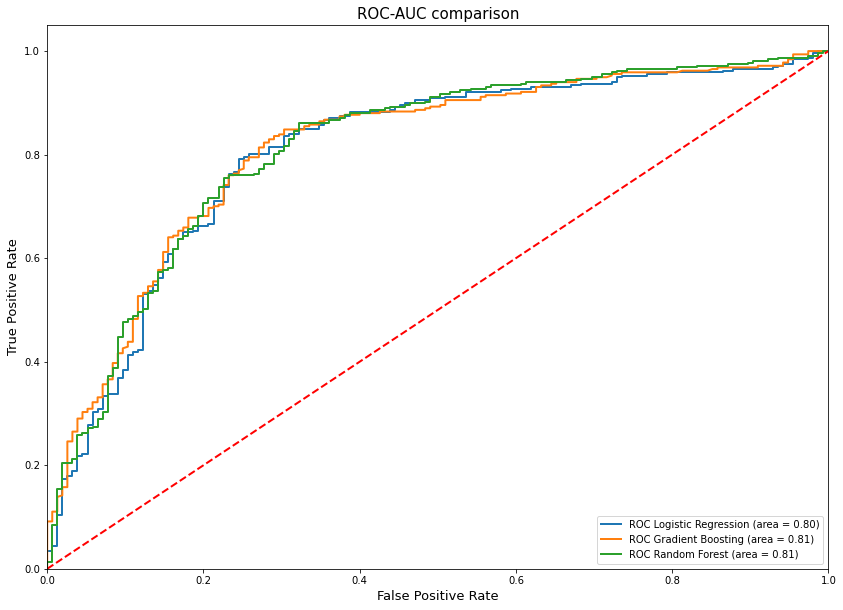

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

for fpr, tpr, model in [(lr_fpr,lr_tpr,'Logistic Regression'),(gb_fpr,gb_tpr,'Gradient Boosting'),(rf_fpr,rf_tpr,'Random Forest')]:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label='ROC '+ model + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC-AUC comparison', fontsize=15)
plt.legend(loc="lower right")
plt.show()

In [19]:
#confusion matrix function retrieved from https://github.com/DTrimarchi10/confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,    
                          figsize=None,
                          fontsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories,annot_kws={"size": fontsize})

    if xyplotlabels:
        plt.ylabel('True label', fontsize=fontsize)
        plt.xlabel('Predicted label' + stats_text, fontsize=fontsize)
    else:
        plt.xlabel(stats_text, fontsize=fontsize)
    
    if title:
        plt.title(title, fontsize=fontsize)

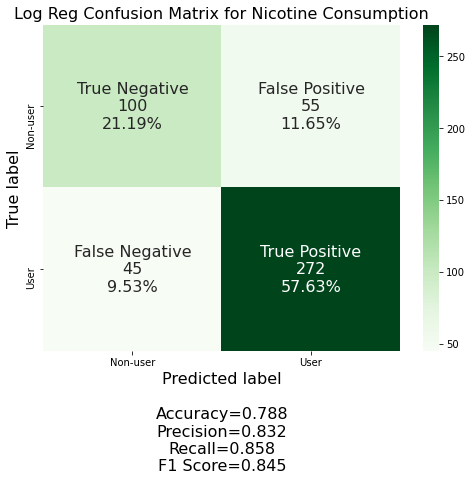

In [33]:
#create confusion matrix for log reg classifier with best parameters
lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Non-user','User']
lr_cf_matrix = confusion_matrix(y_test, lr.predict(X_test))
make_confusion_matrix(lr_cf_matrix,group_names=group_names,categories=categories,fontsize=16,figsize=(8,6),cmap='Greens',title='Log Reg Confusion Matrix for Nicotine Consumption')

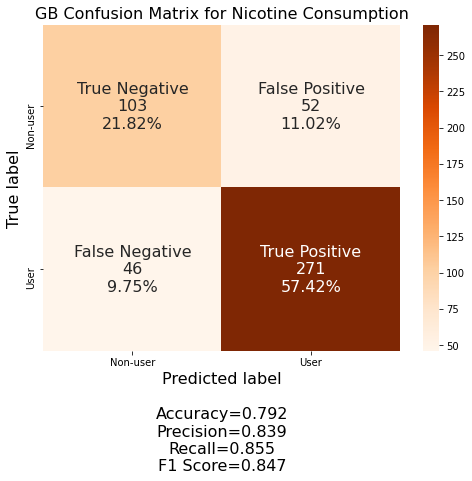

In [32]:
#create confusion matrix for gb classifier with best parameters
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=45)
gb.fit(X_train, y_train)

gb_cf_matrix = confusion_matrix(y_test, gb.predict(X_test))
make_confusion_matrix(gb_cf_matrix,group_names=group_names,categories=categories,fontsize=16,figsize=(8,6),cmap='Oranges',title='GB Confusion Matrix for Nicotine Consumption')

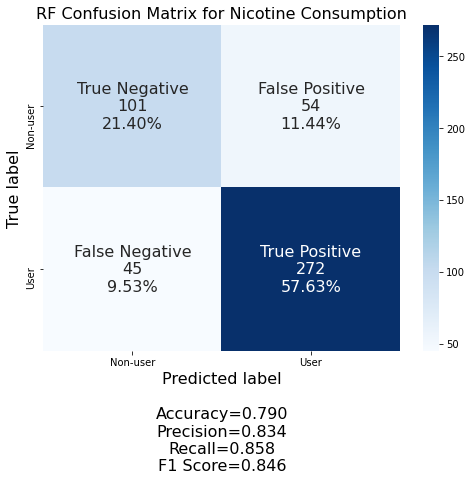

In [31]:
#create confusion matrix for rf classifier with best parameters
rf = RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=55)
rf.fit(X_train, y_train)

rf_cf_matrix = confusion_matrix(y_test, rf.predict(X_test))
make_confusion_matrix(rf_cf_matrix,group_names=group_names,categories=categories,fontsize=16,figsize=(8,6),title='RF Confusion Matrix for Nicotine Consumption')

We care more about recall, we want to help those people who are indeed smokers and are more likely to suffer deteriorating health conditions as they grow older. With that in mind we will proceed with the random forest classifier as it sacrifices some precision for a higher recall score.

In [36]:
from sklearn.metrics import fbeta_score
def precision_recall(model, X_test, y_test, threshold, beta = 2):
    
    y_pred = (model.predict_proba(X_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# people predicted to not be smokers and are not smokers
    tp = matrix[1,1]# people predicted to be smokers and are smokers
    fp = matrix[0,1]# people predicted to be smokers and are not smokers
    fn = matrix[1,0]# people predicted to not be smokers and are smokers (reduce this category -> recall)
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [37]:
threshold_df = pd.DataFrame(columns=['Precision','Recall','F2_measure'])

for threshold in np.arange(0.1,.9,.02):
    threshold_df.loc[threshold] = precision_recall(rf, X_test, y_test, threshold)

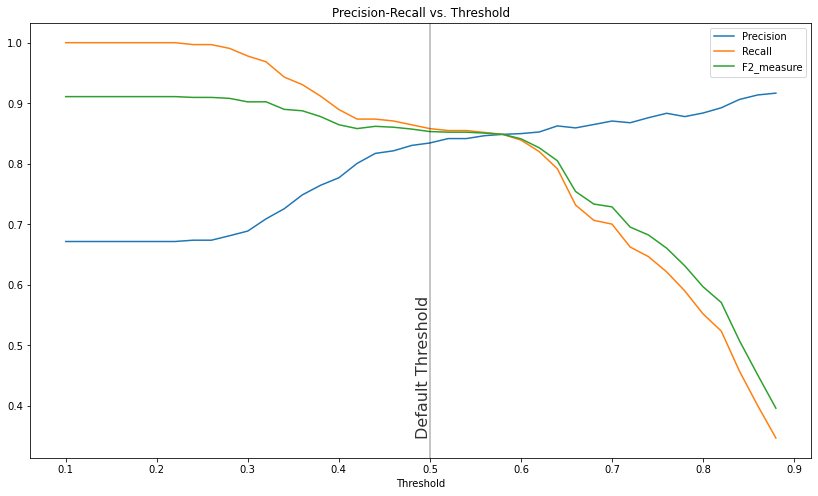

In [38]:
ax = threshold_df.plot(figsize=(14,8))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.5, color ='black', alpha = 0.3)
ax.text(.485,.35,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

              precision    recall  f1-score   support

           0       0.73      0.05      0.10       155
           1       0.68      0.99      0.81       317

    accuracy                           0.68       472
   macro avg       0.70      0.52      0.45       472
weighted avg       0.70      0.68      0.57       472



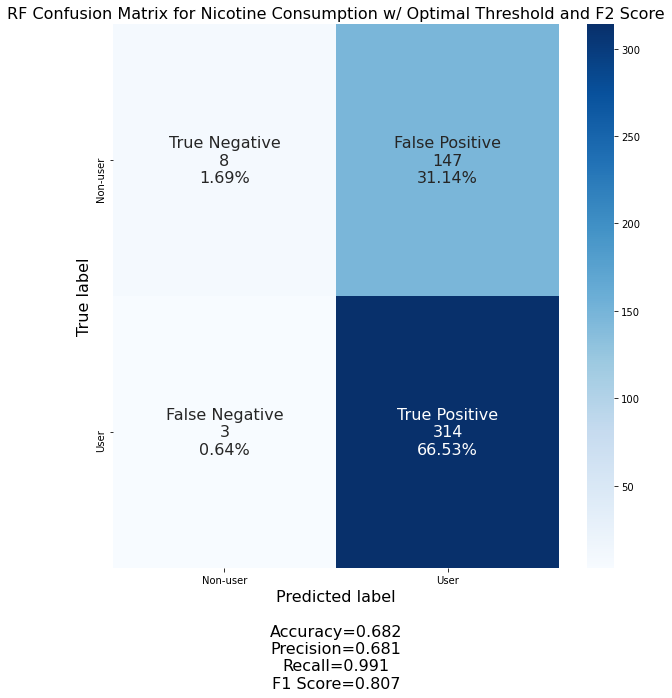

In [39]:
#sanity check confusion matrix with optimal threshold
y_pred = (rf.predict_proba(X_test)[:,1] >= 0.28).astype(bool)


rf_cf_matrix_opt = confusion_matrix(y_test, y_pred)
make_confusion_matrix(rf_cf_matrix_opt,group_names=group_names,categories=categories,fontsize=16,figsize=(10,10),title='RF Confusion Matrix for Nicotine Consumption w/ Optimal Threshold and F2 Score')
print(classification_report(y_test,y_pred))

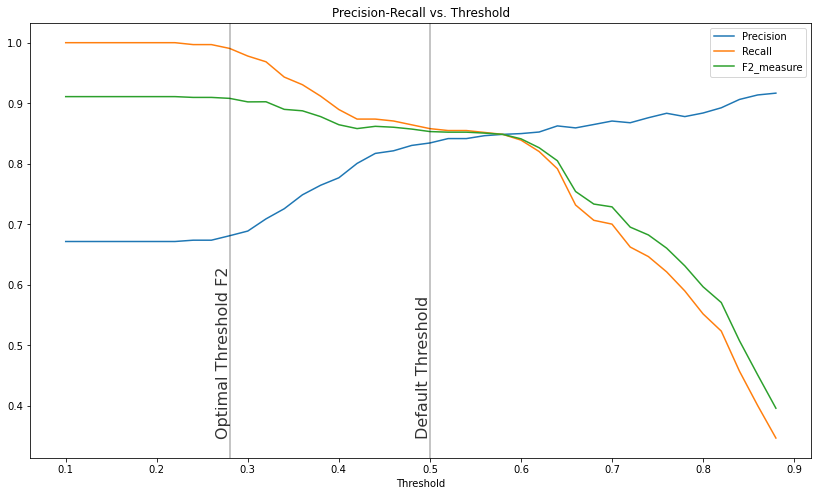

In [40]:
ax = threshold_df.plot(figsize=(14,8))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.28, color='black', alpha=0.3)
ax.text(.265,.35,'Optimal Threshold F2',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.5, color ='black', alpha = 0.3)
ax.text(.485,.35,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

Considering our business problem in order to help at risk individuals or consumers of nicotine, it is of greater benefit to
reduce the number of predictions of actual smokers as not smokers (false negatives). If we were to predict non-smokers as smokers (false positives) it is not that big of a deal as these individuals probably won't pick up the habit of smoking based on the data.

Given that we want to reduce the amount of false negatives our model produces, the graph suggests using a threshold value of about 0.28 will be optimal. This threshold will produce a model that results in almost no false negatives meaning we will be successful in correctly identifying people with high nicotine consumption risk, at the cost of including people who are not at high consumption risk.  